# Haberman's Survival Dataset

## Objective:
### Perform univariate analysis on the dataset (PDF, CDF, BOX PLOT, VIOLIN PLOT, Mean, variance, std deviation
### Median, Percentile, Quantile, IQR, MAD )
### Perform bivariate analysis on the dataset (Pairplot, contour plot etc)
### Perform multivariate analysis (3D Scatter plot)

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Haberman's Survival Dataset

In [142]:
#Creating dataframe out of the dataset
df = pd.read_csv('haberman.csv')

### Renaming columns for ease of operation

In [146]:
df.rename(index=str, columns={"30": "Age", "64": "yearofoperation", "1":"Numberofpositiveaxillarynodesdetected", "1.1":"Survival_status"}, inplace=True)

In [147]:
#lets look at the head
df.head()

,Age,yearofoperation,Numberofpositiveaxillarynodesdetected,Survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


### Replacing the surv_status feature to a string

In [148]:
#create a dictionary
result = {1: 'True', 2:'False'}

In [149]:
#iterating through every element in result features and replacing 1 with True and 2 with False
df.Survival_status = [result[item] for item in df.Survival_status]

In [151]:
df.shape

(305, 4)

In [152]:
df.columns

Index(['Age', 'yearofoperation', 'Numberofpositiveaxillarynodesdetected',
       'Survival_status'],
      dtype='object')

In [153]:
#(Q) How many data points for each class are present?
df['Survival_status'].value_counts()

True     224
False     81
Name: Survival_status, dtype: int64

In [154]:
# There are two labels and out of 305 data points, 224 say it belongs to feature 1 and 81 say it belongs to feature 2

## (1) 2-D Scatter Plot

In [155]:
#By using this, We stop warnings from printing on the screen
import warnings
warnings.filterwarnings('ignore')

In [156]:
%matplotlib inline

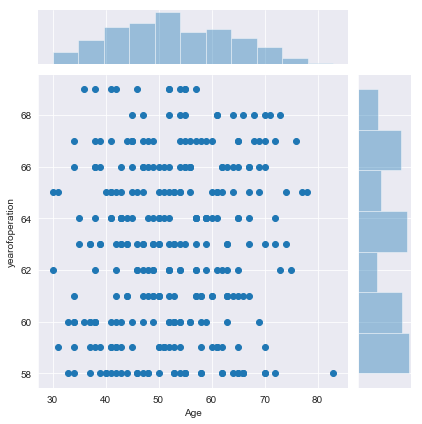

In [157]:
#creating 2D scatter plot with seaborn
plot = sns.jointplot(x='Age', y='yearofoperation', data=df, kind='scatter')
# plot.set_axis_labels('Age of patient at time of operation', 'Patient\'s yearofoperation')

Text(0.5,1,'axillary node VS age ')

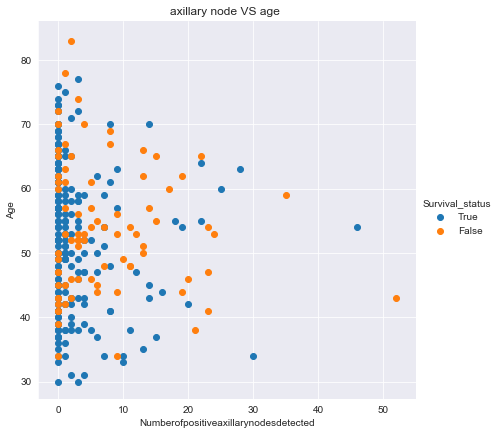

In [158]:
#coloring different data points to distinguish
sns.set_style("darkgrid")
# sns.palplot(sns.color_palette('BuGn_r'))
plot = sns.FacetGrid(data=df, hue="Survival_status", height=6).map(plt.scatter, "Numberofpositiveaxillarynodesdetected", "Age").add_legend()
# plot.set_axis_labels('Numberofpositiveaxillarynodesdetected','Age of patient at time of operation')
plt.title('axillary node VS age ')

### Bivariate Pair-plots

In [160]:
plt.close()

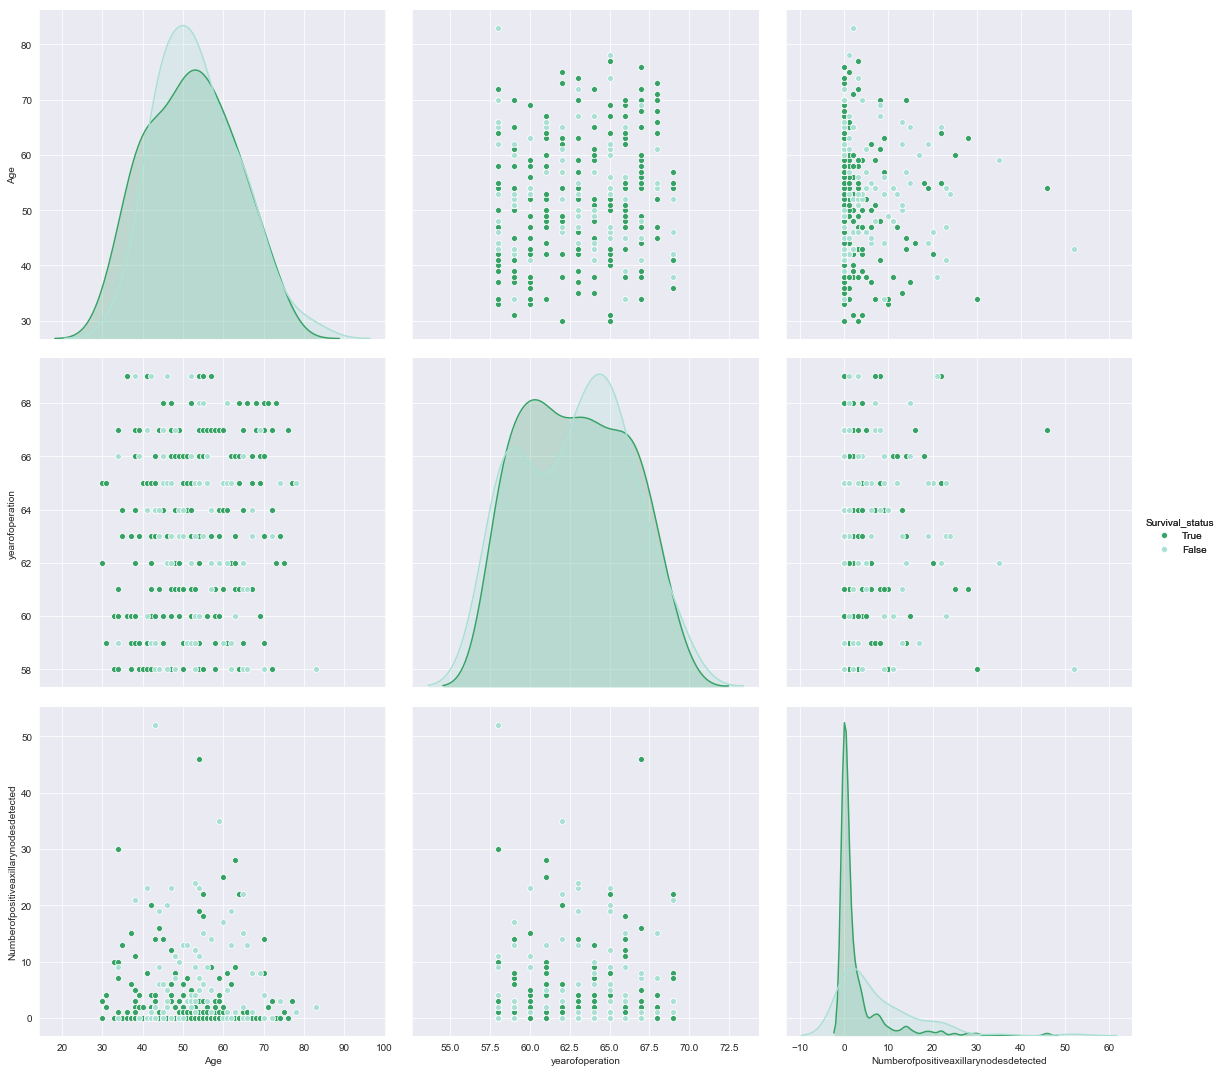

In [161]:
sns.pairplot(df, hue = 'Survival_status',palette='BuGn_r', size=5).add_legend()

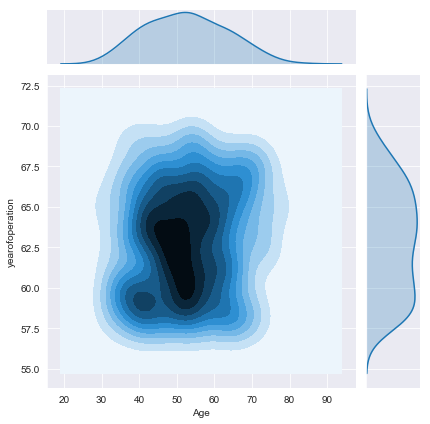

In [162]:
sns.jointplot(x='Age', y='yearofoperation', data=df, kind='kde')

### Histogram, PDF, CDF 

In [163]:
trueset = df.loc[df['Survival_status'] == 'True']

In [164]:
trueset.head()

,Age,yearofoperation,Numberofpositiveaxillarynodesdetected,Survival_status
0,30,62,3,True
1,30,65,0,True
2,31,59,2,True
3,31,65,4,True
4,33,58,10,True


In [165]:
falseset = df.loc[df['Survival_status'] == 'False']

Text(0,0.5,'zeros')

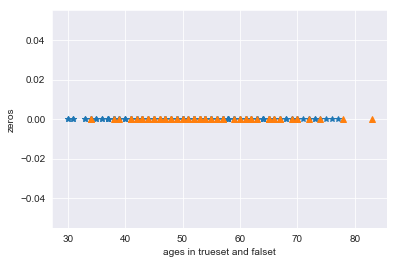

In [166]:
plt.plot(trueset['Age'], np.zeros_like(trueset['Age']),'*',)
plt.plot(falseset['Age'], np.zeros_like(falseset['Age']), '^')
plt.xlabel('ages in trueset and falset')
plt.ylabel('zeros')

Text(0,0.5,'zeros')

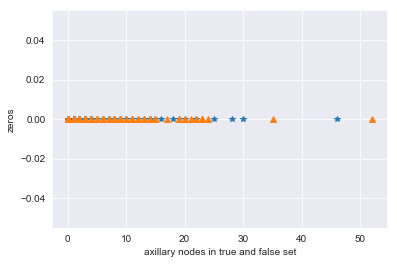

In [167]:
plt.plot(trueset['Numberofpositiveaxillarynodesdetected'], np.zeros_like(trueset['Numberofpositiveaxillarynodesdetected']),'*')
plt.plot(falseset['Numberofpositiveaxillarynodesdetected'], np.zeros_like(falseset['Numberofpositiveaxillarynodesdetected']),'^')
plt.xlabel('axillary nodes in true and false set')
plt.ylabel('zeros')

Text(0,0.5,'zeros')

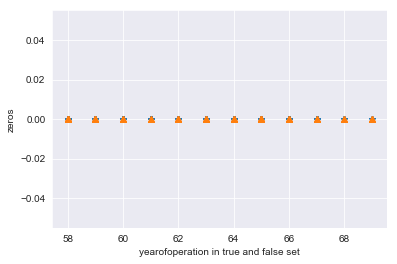

In [169]:
plt.plot(trueset['yearofoperation'], np.zeros_like(trueset['yearofoperation']),'*')
plt.plot(falseset['yearofoperation'], np.zeros_like(falseset['yearofoperation']),'^')
plt.xlabel('yearofoperation in true and false set')
plt.ylabel('zeros')

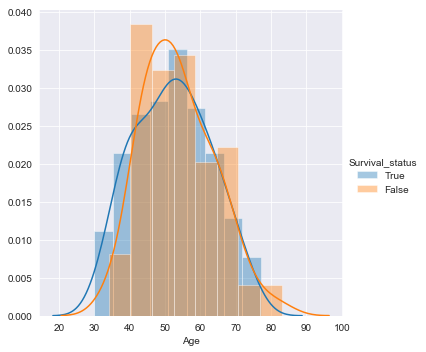

In [170]:
sns.FacetGrid(df, hue="Survival_status", size=5).map(sns.distplot, "Age").add_legend();

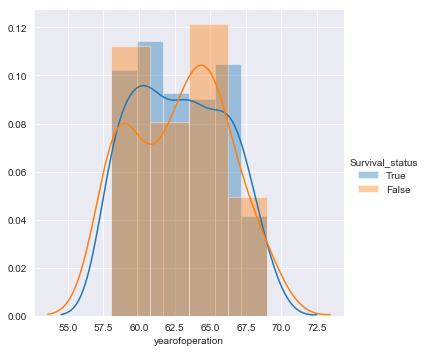

In [171]:
sns.FacetGrid(df, hue="Survival_status", size=5).map(sns.distplot, "yearofoperation").add_legend();

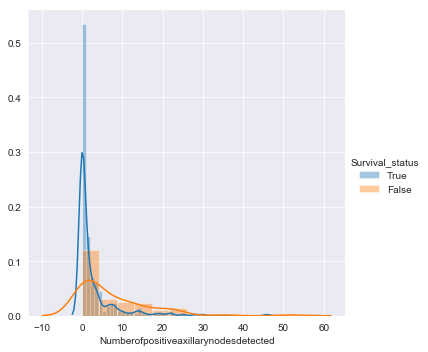

In [172]:
sns.FacetGrid(df, hue="Survival_status", size=5).map(sns.distplot, "Numberofpositiveaxillarynodesdetected").add_legend();

A positive axillary lymph node is a lymph node in the area of the armpit (axilla) to which cancer has spread. This spread is determined by surgically removing some of the lymph nodes and examining them under a microscope to see whether cancer cells are present
We can observe from the distplot that people who survived had the least amount of positive lymph nodes and people who didn't survive had significantly higher number of positive lymph nodes which is a important data

This single predicts whether a particular person will survive or not depending on number of affected lymph nodes

### Cumulative Density function

[0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]


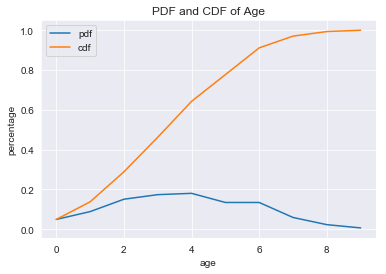

In [206]:
counts, bin_edges = np.histogram(df['Age'], density = True) 
plt.xlabel('age')
plt.ylabel('percentage')
plt.title('PDF and CDF of Age')
pdf = counts/(sum(counts))
print(pdf)
cdf = np.cumsum(pdf)
plt.plot(pdf, label='pdf')
plt.plot(cdf, label='cdf')
plt.legend(loc='upper left')


In [207]:
df.head()

,Age,yearofoperation,Numberofpositiveaxillarynodesdetected,Survival_status
0,30,62,3,True
1,30,65,0,True
2,31,59,2,True
3,31,65,4,True
4,33,58,10,True


[0.20655738 0.09180328 0.0852459  0.07540984 0.09836066 0.09836066
 0.09180328 0.09180328 0.08196721 0.07868852]


Text(0.5,1,'PDF and CDF of yearofoperation')

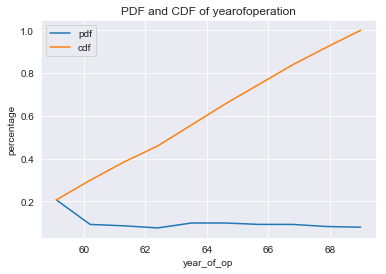

In [216]:
counts, bin_edges = np.histogram(df['yearofoperation'], density = True) 
plt.xlabel('year_of_op')
plt.ylabel('percentage')
pdf = counts/(sum(counts))
print(pdf)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf, label='pdf')
plt.plot(bin_edges[1:], cdf, label='cdf')
plt.legend(loc='upper left')
plt.title('PDF and CDF of yearofoperation')

Text(0.5,1,'PDF and CDF of ages in true and false set')

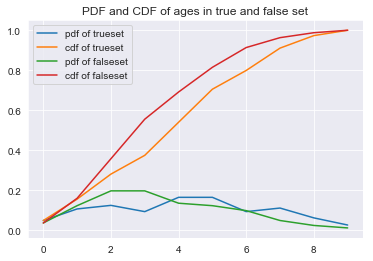

In [224]:
counts, bin_edge = np.histogram(trueset['Age'], density=True,)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(pdf, label='pdf of trueset')
plt.plot(cdf, label='cdf of trueset')
# plt.plot(bin_edges[1:],pdf)
# plt.plot(bin_edges[1:], cdf)


counts, bin_edge = np.histogram(falseset['Age'], density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(pdf, label='pdf of falseset')
plt.plot(cdf, label='cdf of falseset')
plt.legend(loc='upper left')
plt.title('PDF and CDF of ages in true and false set')
# plt.plot(bin_edges[1:],pdf)
# plt.plot(bin_edges[1:], cdf)

####  Mean, Variance and Std-dev

In [225]:
print(np.mean(trueset['Age']))

52.11607142857143


In [226]:
print(np.mean(falseset['Age']))

53.67901234567901


In [251]:
print(np.std(trueset['Age']))

10.913004640364269


In [229]:
print(np.std(trueset['yearofoperation']))

3.2220145175061514


In [236]:
print(np.std(falseset['yearofoperation']))

3.3214236255207883


In [227]:
df.head()

,Age,yearofoperation,Numberofpositiveaxillarynodesdetected,Survival_status
0,30,62,3,True
1,30,65,0,True
2,31,59,2,True
3,31,65,4,True
4,33,58,10,True


### Median

In [253]:
np.median(trueset['Age'])

52.0

In [254]:
np.median(falseset['Age'])

53.0

In [230]:
print(np.percentile(trueset['Age'],np.arange(0, 100, 25)))
print(np.percentile(falseset['Age'],np.arange(0, 100, 25)))

[30. 43. 52. 60.]
[34. 46. 53. 61.]


### MAD

In [256]:
from statsmodels import robust

In [257]:
robust.mad(trueset['Age'])

13.343419966550417

In [258]:
robust.mad(falseset['Age'])

11.860817748044816

### Box plot and Whiskers

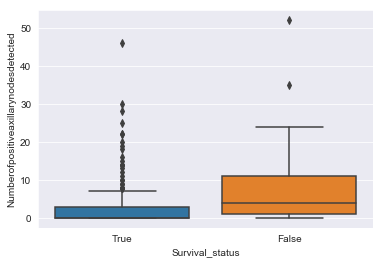

In [231]:
sns.boxplot(x='Survival_status',y='Numberofpositiveaxillarynodesdetected', data=df)

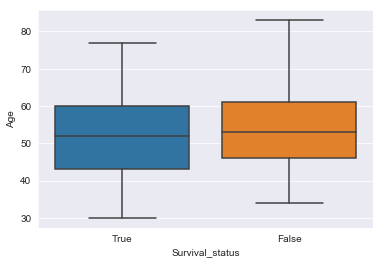

In [232]:
sns.boxplot(x='Survival_status',y='Age', data=df)

### Violin plot
one of the best 2D data visualisation

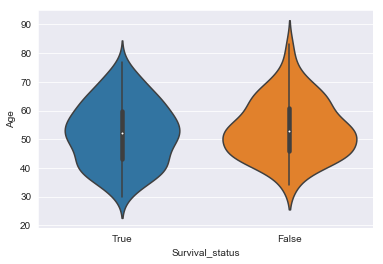

In [233]:
sns.violinplot(x="Survival_status", y="Age", data=df, size=15)

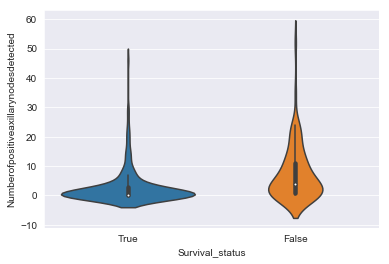

In [234]:
sns.violinplot(x="Survival_status", y="Numberofpositiveaxillarynodesdetected", data=df, size=15)

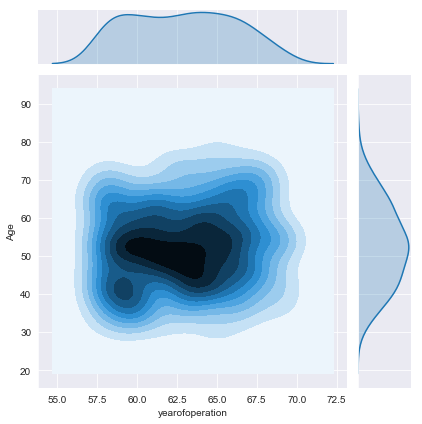

In [235]:
sns.jointplot(x='yearofoperation', y='Age', data=df, kind='kde')

## CONCLUSION: